In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Loading the Fashion MNIST Dataset
fashnion_mnist = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashnion_mnist

In [4]:
# Normalize the images to values between 0 and 1
train_images, test_images = train_images/255., test_images/255.

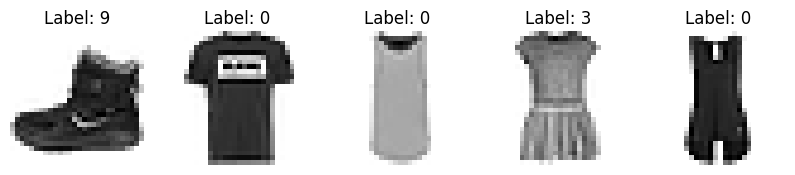

In [5]:
# Visualize first 5 images in the training datasets

plt.figure(figsize = (10,10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.title(f"Label: {train_labels[i]}")
  plt.axis('off')
plt.show()

In [8]:
from os import access
# Building the model
model = models.Sequential([
    layers.Flatten(input_shape= (28,28)),  #to 1 D array
    layers.Dense(128, activation='relu'),
    layers.Dropout(.2),
    layers.Dense(10, activation='softmax')
]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

In [12]:
# Training the model
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7643 - loss: 0.6787 - val_accuracy: 0.8323 - val_loss: 0.4549
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8514 - loss: 0.4043 - val_accuracy: 0.8559 - val_loss: 0.3975
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8658 - loss: 0.3669 - val_accuracy: 0.8666 - val_loss: 0.3688
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8736 - loss: 0.3426 - val_accuracy: 0.8712 - val_loss: 0.3577
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8795 - loss: 0.3233 - val_accuracy: 0.8731 - val_loss: 0.3535


In [13]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8759 - loss: 0.3492
Test accuracy: 0.8730999827384949


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


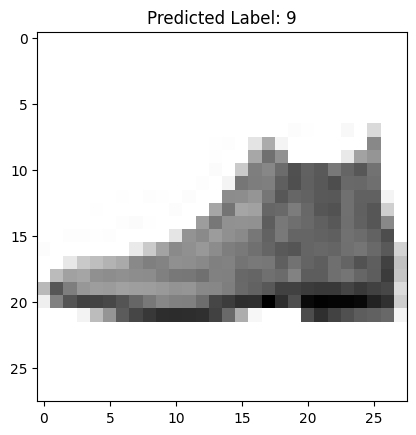

In [15]:
predictions = model.predict(test_images)

# Display the first image and its predicted label
plt.imshow(test_images[0], cmap = plt.cm.binary)
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.show()